# Importing/Storing data

In [1]:
# pip install wfdb
# pip install 

In [2]:
import wfdb
import os
import glob
import pandas as pd
import numpy as np
#%matplotlib notebook
import matplotlib.pyplot as plt

In [3]:
#print('Current directory is: {}'.format(os.getcwd()))

In [4]:
records = []
properties = []
annot = []
AnnSymb = []
AnnSamp = []
AnnRhythm = []
Rpeak_Samp = []
Rpeak_Symb = []


for f in glob.glob('C:/Users/masud/Desktop/Github_Bachelor_Project/wfdb-python/data/*.dat'): ##### change the path (afib) to your own directory. The rest should 
                                                                                             ##### remin the same
    sig, fields = wfdb.rdsamp(f[:-4], channels=[1])  #### In this function, you have the opportunity to pass 
                                       #### "channels=[0]" or "channels=[1]" to select channel 1 or 2.
    ann = wfdb.rdann(f[:-4], 'atr')
    QRS = wfdb.rdann(f[:-4], 'qrs')
    Symb = pd.Series(ann.symbol)
    Samp = pd.Series(ann.sample)
    QRS_Symb = pd.Series(QRS.symbol)
    QRS_Samp = pd.Series(QRS.sample)
    Rhythm = pd.Series(ann.aux_note)
    records.append(sig)
    properties.append(fields)
    annot.append(ann)
    AnnSymb.append(Symb)
    AnnSamp.append(Samp)
    Rpeak_Symb.append(QRS_Symb)
    Rpeak_Samp.append(QRS_Samp)
    AnnRhythm.append(Rhythm)
    
    

AnnSymb = pd.Series(AnnSymb).values
AnnSamp = pd.Series(AnnSamp).values

In [5]:
#This is only for last record, calculated in above loop
print(AnnRhythm[22])
print("------------------------------------")
print(AnnSamp[22])
print("------------------------------------")
print("All samples of R-peaks below")
print(Rpeak_Samp[22])
print("------------------------------------")
print(records[22])
print(type(records[22]))
#print(np.where(Rpeak_Samp[22] <= ))
#df.iloc[22] # acessing ROW 22

0       (N
1    (AFIB
2       (N
3    (AFIB
dtype: object
------------------------------------
0         96
1    2808396
2    2820743
3    2850351
dtype: int32
------------------------------------
All samples of R-peaks below
0            193
1            390
2            586
3            782
4            905
          ...   
59547    8999654
59548    8999811
59549    8999879
59550    8999948
59551    9000001
Length: 59552, dtype: int32
------------------------------------
[[-0.37 ]
 [-0.45 ]
 [-0.43 ]
 ...
 [-0.52 ]
 [-0.52 ]
 [-0.565]]
<class 'numpy.ndarray'>


# Working oon...

In [6]:
#x = np.random.rand(100)
rec = Rpeak_Samp[22]
samp = AnnSamp[22]
#label_column = np.where((rec > samp[0]) & (rec < samp[1]), '(N', 'NaN')
#label_column = np.where((rec > samp[1]) & (rec < samp[2]), '(AFIB', 'NaN')
#df = pd.DataFrame(Rpeak_Samp[22])
#df['Label'] = label_column
#df

In [7]:
#maksing
#rec[(rec > samp[0]) & (rec < samp[1])]

df1 = pd.DataFrame(rec[(rec > samp[0]) & (rec < samp[1])])
df1['Label'] = '(N'
df1

df2 = pd.DataFrame(rec[(rec > samp[1]) & (rec < samp[2])])
df2['Label'] = '(AFIB'
df2

df3 = pd.concat([df1, df2])
df3

,0,Label
0,193,(N
1,390,(N
2,586,(N
3,782,(N
4,905,(N
...,...,...
15216,2820185,(AFIB
15217,2820295,(AFIB
15218,2820388,(AFIB
15219,2820505,(AFIB


In [8]:
a = np.array([[1,2], [3,4], [5,6]])

print(np.shape(a))
print(a)
print("--------------------------")
a_trans = np.transpose(a)
print(np.shape(a_trans))
print(a_trans)

(3, 2)
[[1 2]
 [3 4]
 [5 6]]
--------------------------
(2, 3)
[[1 3 5]
 [2 4 6]]


In [35]:
print(records[22])
print(np.shape(records[22]))
print()
print()
records_trans = np.transpose(records[22])
print(np.shape(records_trans))
#records[22].flatten()
#np.squeeze(records[22], axis=1)
#np.shape(records[22])

[[-0.37 ]
 [-0.45 ]
 [-0.43 ]
 ...
 [-0.52 ]
 [-0.52 ]
 [-0.565]]
(9205760, 1)


(1, 9205760)


In [36]:
###Run with heartbeats
from window_slider import Slider
import numpy
list = records_trans
bucket_size = 6600
overlap_count = 3300
slider = Slider(bucket_size,overlap_count)
slider.fit(list)       
while True:
    window_data = slider.slide()
    # do your stuff
    print(window_data)
    if slider.reached_end_of_list(): break

[[-0.37  -0.45  -0.43  ... -0.525 -0.58  -0.665]]
[[-1.03  -1.1   -1.015 ... -0.12  -0.22  -0.26 ]]
[[-0.66  -0.56  -0.58  ... -0.595 -0.475 -0.445]]
[[-0.2   -0.16  -0.265 ... -0.36  -0.265 -0.31 ]]
[[-0.565 -0.625 -0.555 ...  0.53   0.075 -0.435]]
[[-0.42  -0.515 -0.45  ... -0.235 -0.25  -0.125]]
[[-0.79  -0.81  -0.715 ... -0.175 -0.215 -0.315]]
[[-0.095 -0.23  -0.25  ...  0.185  0.06  -0.02 ]]
[[-0.315 -0.195 -0.22  ... -0.34  -0.325 -0.2  ]]
[[-0.01   0.01  -0.095 ... -0.39  -0.44  -0.345]]
[[-0.195 -0.31  -0.375 ... -0.415 -0.49  -0.46 ]]
[[-0.31  -0.385 -0.46  ...  0.63   0.42  -0.17 ]]
[[-0.39  -0.425 -0.495 ... -0.45  -0.36  -0.405]]
[[-0.78  -1.18  -1.335 ... -0.245 -0.32  -0.355]]
[[-0.53  -0.53  -0.43  ... -0.015 -0.115 -0.17 ]]
[[-0.27  -0.19  -0.2   ... -0.525 -0.44  -0.37 ]]
[[-0.105 -0.045 -0.125 ... -0.3   -0.41  -0.44 ]]
[[-0.425 -0.47  -0.395 ... -1.1   -0.88  -0.64 ]]
[[-0.345 -0.29  -0.365 ...  0.255  0.46   0.8  ]]
[[-0.615 -0.65  -0.59  ... -0.47  -0.53  -0.6  ]]


[[ 0.    -0.04  -0.065 ... -0.675 -0.975 -1.205]]
[[-0.105 -0.13  -0.125 ... -0.1   -0.1   -0.125]]
[[-1.67  -2.07  -2.225 ... -0.79  -1.065 -1.35 ]]
[[-0.1   -0.105 -0.115 ...  0.195  0.245  0.28 ]]
[[-1.6   -1.725 -1.555 ...  0.14   0.135  0.12 ]]
[[0.28  0.13  0.01  ... 0.005 0.05  0.07 ]]
[[0.11  0.165 0.23  ... 0.14  0.14  0.17 ]]
[[0.165 0.215 0.245 ... 0.195 0.185 0.175]]
[[0.16  0.21  0.265 ... 0.085 0.06  0.085]]
[[0.145 0.115 0.09  ... 0.49  0.495 0.545]]
[[ 0.03   0.035 -0.005 ...  0.11   0.045  0.06 ]]
[[0.51  0.5   0.515 ... 0.065 0.105 0.11 ]]
[[0.07  0.115 0.12  ... 0.03  0.005 0.   ]]
[[0.055 0.02  0.03  ... 0.93  0.94  0.915]]
[[ 0.005 -0.005  0.    ...  0.705  0.695  0.75 ]]
[[ 0.895  0.885  0.83  ... -0.39  -0.385 -0.38 ]]
[[ 0.76   0.735  0.715 ... -0.665 -0.58  -0.49 ]]
[[-0.385 -0.375 -0.36  ...  0.245  0.275  0.26 ]]
[[-0.525 -0.59  -0.6   ...  0.295  0.28   0.325]]
[[ 0.31   0.27   0.29  ... -0.085 -0.1   -0.12 ]]
[[0.35  0.315 0.275 ... 0.225 0.225 0.13 ]]
[[-0

[[-0.22  -0.255 -0.3   ...  0.11   0.13   0.085]]
[[-0.455 -0.435 -0.405 ...  0.285  0.25   0.16 ]]
[[ 0.075  0.09   0.14  ... -0.105 -0.065 -0.02 ]]
[[ 0.175  0.185  0.16  ...  0.05   0.025 -0.01 ]]
[[-0.01  -0.025 -0.05  ...  0.575  0.59   0.575]]
[[ 0.025  0.    -0.025 ...  0.    -0.07  -0.085]]
[[0.66  0.675 0.695 ... 0.    0.01  0.01 ]]
[[-0.055 -0.015 -0.06  ... -0.13  -0.17  -0.205]]
[[-0.01  -0.03  -0.005 ... -0.99  -0.95  -0.835]]
[[-0.265 -0.195 -0.225 ... -0.285 -0.275 -0.29 ]]
[[-0.8   -0.76  -0.665 ... -1.415 -0.935 -0.71 ]]
[[-0.335 -0.27  -0.245 ... -0.06  -0.045 -0.025]]
[[-0.615 -0.51  -0.425 ...  1.05   1.005  0.965]]
[[0.06 0.04 0.07 ... 0.27 0.18 0.13]]
[[ 0.965  0.97   0.9   ... -0.35  -0.345 -0.38 ]]
[[0.07  0.07  0.015 ... 0.025 0.075 0.13 ]]
[[-0.345 -0.32  -0.345 ... -0.395 -0.4   -0.42 ]]
[[0.145 0.105 0.105 ... 0.305 0.495 0.62 ]]
[[-0.36  -0.375 -0.385 ... -0.205 -0.2   -0.145]]
[[ 0.735  0.865  1.045 ... -0.48  -0.52  -0.555]]
[[-0.14  -0.16  -0.155 ...  0.

[[-0.34  -0.295 -0.34  ... -0.025 -0.015 -0.035]]
[[-0.145 -0.145 -0.155 ...  0.02   0.02  -0.04 ]]
[[-0.035 -0.015 -0.04  ... -0.105 -0.12  -0.165]]
[[ 0.005  0.035  0.04  ... -1.465 -1.945 -2.32 ]]
[[-0.15  -0.11  -0.13  ...  0.115  0.115  0.095]]
[[-2.39  -2.16  -1.69  ...  0.605  0.6    0.645]]
[[ 0.02  -0.01   0.025 ...  0.06   0.03   0.   ]]
[[ 0.635  0.605  0.565 ... -0.22  -0.18  -0.17 ]]
[[ 0.02   0.045 -0.015 ...  0.025  0.005 -0.01 ]]
[[-0.2   -0.125 -0.135 ...  0.22   0.175  0.175]]
[[-0.005  0.04   0.04  ...  0.41   0.615  0.655]]
[[ 0.18   0.11   0.025 ... -0.195 -0.115 -0.1  ]]
[[ 0.305 -0.225 -0.705 ... -0.025 -0.1   -0.08 ]]
[[-0.05  -0.045 -0.095 ...  0.555  0.52   0.52 ]]
[[-0.055 -0.04  -0.08  ...  0.66   0.62   0.54 ]]
[[ 0.47   0.38   0.315 ... -0.115 -0.105 -0.115]]
[[ 0.435  0.41   0.385 ...  0.66  -0.025 -0.775]]
[[-0.04   0.11   0.26  ... -0.795 -0.795 -0.78 ]]
[[-1.385 -2.005 -2.375 ...  0.04   0.04   0.   ]]
[[-0.81  -0.895 -0.925 ...  0.135  0.16   0.155]]


[[0.52  0.52  0.47  ... 0.475 0.435 0.4  ]]
[[0.425 0.375 0.335 ... 0.645 0.73  0.755]]
[[0.375 0.4   0.355 ... 0.505 0.47  0.43 ]]
[[0.76  0.775 0.82  ... 0.21  0.215 0.285]]
[[ 0.455  0.43   0.38  ... -0.16  -0.18  -0.195]]
[[ 0.285  0.23   0.235 ...  0.51   0.13  -0.055]]
[[-0.135 -0.12  -0.145 ...  0.51   0.505  0.575]]
[[-0.14  -0.085  0.005 ... -0.715 -0.67  -0.645]]
[[0.6   0.6   0.605 ... 0.435 0.54  0.275]]
[[-0.72  -0.77  -0.72  ...  5.525  5.58   5.585]]
[[-0.4   -0.96  -1.33  ... -0.08  -0.155 -0.155]]
[[5.595 5.595 5.61  ... 0.885 0.835 0.805]]
[[-0.11  -0.045 -0.07  ... -0.715 -0.755 -0.78 ]]
[[0.875 0.9   0.885 ... 1.045 1.03  0.98 ]]
[[-0.77  -0.775 -0.795 ...  0.03  -0.015 -0.04 ]]
[[0.925 0.995 1.07  ... 0.78  0.765 0.69 ]]
[[0.05  0.045 0.005 ... 0.02  0.085 0.075]]
[[0.635 0.665 0.705 ... 0.275 0.27  0.24 ]]
[[-0.01   0.005  0.055 ... -0.02  -0.04  -0.065]]
[[0.295 0.35  0.33  ... 0.665 0.67  0.625]]
[[-0.065 -0.015 -0.02  ... -0.315 -0.355 -0.385]]
[[0.64  0.66  0.

### Visualising the ECG signals

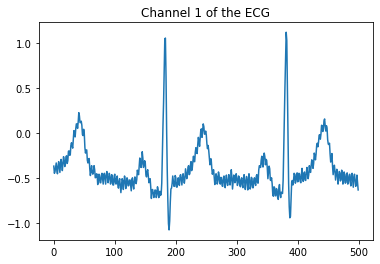

In [11]:
#plt.title("Both Channels (0 and 1)")
#plt.title("Channel 0 of the ECG") #Called ['ECG1']
plt.title('Channel 1 of the ECG') #Called ['ECG2']
plt.plot(sig[:500])

### Accessing annotations 

In [12]:
#display(fields) ### Last record annotation
#print(f"Units in which the ECG is measured {fields['units']}")

In [13]:
#display(properties[22])
#print(f"Units in which the ECG is measured {properties[22]['units']}")

# Calculating the R to R Intervals

In [14]:
single_record_rri = []
rri = []

squared_summed_differencies = 0
i = 0
for i in range(len(Rpeak_Samp)): ### loops 23 times
    single_record_rri = np.diff(Rpeak_Samp[i])
    rri.append(single_record_rri)

In [15]:
#A sample of 250 elements, gives 1 clear signal (because 250hz frequency)
#x = np.arange(0,250)
#plt.plot(x,rri[22][750:1000])

# Segmenting the records and calculating features

In [16]:
#seg_all_rec = []

#amount_to_segment = -(len(rri[0]) % 20)
#record_to_segment = rri[0][:amount_to_segment]
#length = len(record_to_segment) / 20
#segmented_record = np.split(record_to_segment,length)
#seg_all_rec.append(segmented_record)

In [17]:
single_record_mean = []
rri_mean = []
single_record_std = []
rri_std = []
single_record_RMSSD = []
RMSSD = []
single_record_nRMSSD = []
nRMSSD = []

all_segmented_records = []
all_features = []


### TO acess every single record
### record_to_segment = rri[index]
for index in range(len(rri)): ### Loops 23 times
    #(below line) gives a value between 0 and 19, which is the amount used to remove from the end of a record, by slicing.
    amount_to_segment = -(len(rri[index]) % 20)
    if amount_to_segment != 0:
        rri_segmented_record = rri[index][:amount_to_segment]
    else: 
        rri_segmented_record = rri[index] #if divisible by 20, no need to slice this record
    #(below line) gives us the number of "blocks" to put every single 20-segment into.
    length = len(rri_segmented_record) / 20
    rri_segmented_record = np.split(rri_segmented_record,length)
    all_segmented_records.append(rri_segmented_record)
    
    features = []
    
    ### Calculating features for every single segmented "block" inside the segmented_record variable
    for i in range(len(rri_segmented_record)):
        #MEAN
        f1 = np.mean(rri_segmented_record[i])
        #STD
        f2 = np.std(rri_segmented_record[i])
        #RMSSD
        sqaured_summed_differencies = 0
        for k in range(len(rri_segmented_record[i]) - 1): ### loops 19 times
            sqaured_summed_differencies += (rri_segmented_record[i][k] - rri_segmented_record[i][k+1])**2
        squared_summed_differencies_multiplied = 1/(len(rri_segmented_record) - 1) * sqaured_summed_differencies
        f3 = np.sqrt(squared_summed_differencies_multiplied)
        #NORMALIZED RMSSD
        f4 = (f3 / f1)
        
        my_features = pd.Series([np.around(f1,3), np.around(f2,3), np.around(f3,3), np.around(f4,3)], index=['Mean','STD','RMSSD','Normalized RMSSD'])
        features.append(my_features)
        
    all_features.append(features)

### Features for a single block (20 heart beats), inside a given record
### Accessing the 23 individual records (index 0 to 22), gives a single record, that is segmented into arrays of 20. Accessing each 20 array segment/block, by indexing, this time second dimension [ ]-->[ ]<--

In [18]:
n = 3
m = 156

print(f"Record nr {n}, and index {m} in that record contains this segment:") 
print(all_segmented_records[n][m])
print("Features for that specific segment:") 
print(all_features[n][m])

Record nr 3, and index 156 in that record contains this segment:
[165 175 173 170 162 163 165 169 167 169 164 165 162 168 170 169 169 165
 168 169]
Features for that specific segment:
Mean                167.350
STD                   3.380
RMSSD                 0.379
Normalized RMSSD      0.002
dtype: float64


### conversion to numpy arrays

In [19]:
#print(len(all_segmented_records[17]))
#print(len(all_features[18]))

In [20]:
#segmented_arr = np.asarray(all_segmented_records[17])
#feature_arr = np.asarray(all_features[17])
#feature_arr

# Classifications algorithms

### SVM

In [21]:
#from sklearn.model_selection import train_test_split
#X = all_features[3]

In [22]:
#from sklearn import svm
#X = [[0, 0], [1, 1]]
#y = [0, 1]
#X = all_features[3]
#y = np.arange(2167)
#clf = svm.SVC()
#clf.fit(X, y)

In [23]:
#Z = np.asarray(all_features[18])
#predicted = clf.predict(Z) 

### Decision trees

In [37]:
from sklearn import tree
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

In [38]:
clf.predict([[2., 2.]])

array([1])

In [41]:
from sklearn.datasets import load_iris
from sklearn import tree
X, y = load_iris(return_X_y=True)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

[Text(167.4, 199.32, 'X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(154.5230

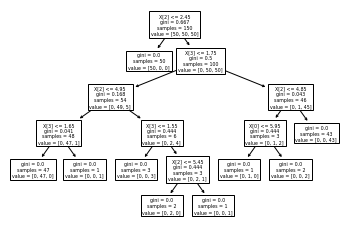

In [42]:
tree.plot_tree(clf) 

# Cross-validation

In [25]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm

X, y = datasets.load_iris(return_X_y=True) ### instead of using iris dataset
X.shape, y.shape

((150, 4), (150,))

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=0)

X_train.shape, y_train.shape

X_test.shape, y_test.shape


clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)

0.9666666666666667

In [27]:
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, X, y, cv=5)
scores


array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])